In [81]:
import numpy as np
import torch; import torch.nn as nn
import pandas as pd

In [82]:
data = np.load('smallData.npy')
data=data.T
data, data.shape

(array([[29.0586  , 47.9465  , 29.52    , ..., 32.8611  , 24.8888  ,
         38.0843  ],
        [ 3.51197 ,  0.776638, -1.08473 , ...,  2.96541 , -0.661697,
         -1.09276 ],
        [ 1.50301 , -1.25197 ,  1.83423 , ...,  1.88251 , -1.24262 ,
          1.36098 ],
        ...,
        [ 3.37982 ,  0.811412, -1.13102 , ...,  2.94258 , -0.672143,
         -1.13099 ],
        [ 1.47013 , -1.32412 ,  1.80182 , ...,  1.85921 , -1.21499 ,
          1.33004 ],
        [13.2444  , 10.5506  ,  7.65844 , ...,  8.8265  ,  4.87261 ,
          3.94825 ]]),
 (12, 100000))

In [83]:
rawRecoData=data[0:4,:].T
pd.DataFrame(rawRecoData).head()

,0,1,2,3
0,29.0586,3.511970,1.503010,5.69919
1,47.9465,0.776638,-1.251970,6.72517
2,29.5200,-1.084730,1.834230,4.06446
3,23.2719,-2.822960,0.216718,3.50878
4,30.4644,2.985000,1.306930,4.11101


In [84]:
recoData = data[4:8,:].T
pd.DataFrame(rawRecoData).head()

,0,1,2,3
0,29.0586,3.511970,1.503010,5.69919
1,47.9465,0.776638,-1.251970,6.72517
2,29.5200,-1.084730,1.834230,4.06446
3,23.2719,-2.822960,0.216718,3.50878
4,30.4644,2.985000,1.306930,4.11101


In [85]:
genData = data[8:12,:].T
pd.DataFrame(genData).head()

,0,1,2,3
0,45.4608,3.379820,1.470130,13.24440
1,56.2643,0.811412,-1.324120,10.55060
2,34.6377,-1.131020,1.801820,7.65844
3,27.4120,-2.842550,0.345529,5.18675
4,30.3263,3.040300,1.341270,5.74890


In [86]:
df = pd.DataFrame(data[0:12,:].T)

levels = ['rawRecoData', 'RecoData', 'genData']
kinematics=['pT','eta','phi','m']

columns = [level+k for level in levels for k in kinematics]
columns

['rawRecoDatapT',
 'rawRecoDataeta',
 'rawRecoDataphi',
 'rawRecoDatam',
 'RecoDatapT',
 'RecoDataeta',
 'RecoDataphi',
 'RecoDatam',
 'genDatapT',
 'genDataeta',
 'genDataphi',
 'genDatam']

In [87]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,29.0586,3.511970,1.503010,5.69919,40.3892,3.41479,1.47023,12.53740,45.4608,3.379820,1.470130,13.24440
1,47.9465,0.776638,-1.251970,6.72517,40.3892,3.41479,1.47023,12.53740,56.2643,0.811412,-1.324120,10.55060
2,29.5200,-1.084730,1.834230,4.06446,29.3586,-1.17862,1.84039,9.95503,34.6377,-1.131020,1.801820,7.65844
3,23.2719,-2.822960,0.216718,3.50878,20.9593,2.13374,-2.86886,9.55921,27.4120,-2.842550,0.345529,5.18675
4,30.4644,2.985000,1.306930,4.11101,35.2909,2.96499,1.36464,10.69580,30.3263,3.040300,1.341270,5.74890


In [88]:
df.columns = columns
df.head(), df.shape

(   rawRecoDatapT  rawRecoDataeta  rawRecoDataphi  rawRecoDatam  RecoDatapT  \
 0        29.0586        3.511970        1.503010       5.69919     40.3892   
 1        47.9465        0.776638       -1.251970       6.72517     40.3892   
 2        29.5200       -1.084730        1.834230       4.06446     29.3586   
 3        23.2719       -2.822960        0.216718       3.50878     20.9593   
 4        30.4644        2.985000        1.306930       4.11101     35.2909   
 
    RecoDataeta  RecoDataphi  RecoDatam  genDatapT  genDataeta  genDataphi  \
 0      3.41479      1.47023   12.53740    45.4608    3.379820    1.470130   
 1      3.41479      1.47023   12.53740    56.2643    0.811412   -1.324120   
 2     -1.17862      1.84039    9.95503    34.6377   -1.131020    1.801820   
 3      2.13374     -2.86886    9.55921    27.4120   -2.842550    0.345529   
 4      2.96499      1.36464   10.69580    30.3263    3.040300    1.341270   
 
    genDatam  
 0  13.24440  
 1  10.55060  
 2   7.65

In [89]:
tau = np.random.uniform(0,1, size = df.shape[0])
tau

array([0.53652539, 0.13053623, 0.50016227, ..., 0.11958587, 0.5541255 ,
       0.05202467])

In [90]:
df['tau'] = tau
df.head()

,rawRecoDatapT,rawRecoDataeta,rawRecoDataphi,rawRecoDatam,RecoDatapT,RecoDataeta,RecoDataphi,RecoDatam,genDatapT,genDataeta,genDataphi,genDatam,tau
0,29.0586,3.511970,1.503010,5.69919,40.3892,3.41479,1.47023,12.53740,45.4608,3.379820,1.470130,13.24440,0.536525
1,47.9465,0.776638,-1.251970,6.72517,40.3892,3.41479,1.47023,12.53740,56.2643,0.811412,-1.324120,10.55060,0.130536
2,29.5200,-1.084730,1.834230,4.06446,29.3586,-1.17862,1.84039,9.95503,34.6377,-1.131020,1.801820,7.65844,0.500162
3,23.2719,-2.822960,0.216718,3.50878,20.9593,2.13374,-2.86886,9.55921,27.4120,-2.842550,0.345529,5.18675,0.490624
4,30.4644,2.985000,1.306930,4.11101,35.2909,2.96499,1.36464,10.69580,30.3263,3.040300,1.341270,5.74890,0.417064


In [91]:
df.to_csv('Data.csv')

# Load Data

In [92]:
data = pd.read_csv('Data.csv')
recpt = data['RecoDatapT']
genpt= data['genDatapT']
recpt

0        40.3892
1        40.3892
2        29.3586
3        20.9593
4        35.2909
          ...   
99995    23.5554
99996    23.5554
99997    27.0034
99998    23.8815
99999    33.2208
Name: RecoDatapT, Length: 100000, dtype: float64

In [93]:
rechist, bins = np.histogram(recpt, bins=100)
genhist, _ = np.histogram(genpt, bins=100)

Text(0, 0.5, '$p_T^{rec}/p_T^{gen}$')

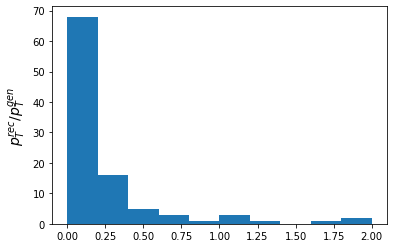

In [ ]:
np=  rechist/(genhist+1e-10)
plt.hist(np)
plt.ylabel(r'$p_T^{rec}/p_T^{gen}$', fontsize=14)